In [16]:
import yfinance as yf
from bcb import sgs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt 
import talib as tb
import statsmodels.api as sm

In [17]:
cdi = sgs.get({'CDI':12}, start='2005-01-01')

In [18]:
ipca = sgs.get({'IPCA':433}, start='2005-01-01')

In [19]:
df_wege = yf.download("WEGE3.SA", period='18y')

[*********************100%***********************]  1 of 1 completed


In [20]:
df_wege["ipca"] = ipca

In [21]:
df_wege["ipca"] = df_wege["ipca"].fillna(0)

In [22]:
valor = None
for i in range(len(df_wege)):
    if(df_wege["ipca"].iloc[i] != 0):
        valor = df_wege["ipca"].iloc[i]
    elif(df_wege["ipca"].iloc[i] == 0):
        df_wege["ipca"].iloc[i] = valor 




c:\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


TRADE SYSTEM MACD ONLY LONG&SHORT

In [23]:
fast, slow, histogram = tb.MACD(df_wege['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)


In [24]:
df_wege["fastsignal"] = fast
df_wege["slowsignal"] = slow
df_wege["hist"] = histogram

In [25]:
number_of_orders = None
sinal_macd = list([])
for i in range(len(df_wege)):
    if (df_wege["fastsignal"].iloc[i-1] <= df_wege["slowsignal"].iloc[i])&(df_wege["fastsignal"].iloc[i] > df_wege["slowsignal"].iloc[i])&((number_of_orders == 0)or(number_of_orders == None)):
        sinal_macd.append(1)
        number_of_orders = 1
        print(1)
    elif (df_wege["fastsignal"].iloc[i-1] >= df_wege["slowsignal"].iloc[i])&(df_wege["fastsignal"].iloc[i] < df_wege["slowsignal"].iloc[i])&((number_of_orders == 1)or(number_of_orders == None)):
        sinal_macd.append(-1)
        number_of_orders = 0
        print(2)
    else:
        sinal_macd.append(0)  
        print(0)  

sinal_macd = pd.DataFrame(sinal_macd)
sinal_macd.value_counts()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
2
1
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0


 0    4130
-1     173
 1     173
dtype: int64

In [26]:
df_wege["macdsignal"] = sinal_macd.values

In [27]:
ultimo_valor = None
for i in range(len(df_wege)):
    if(df_wege["macdsignal"].iloc[i] != 0):
        ultimo_valor = df_wege["macdsignal"].iloc[i]
    elif(df_wege["macdsignal"].iloc[i] == 0):
        df_wege["macdsignal"].iloc[i] = ultimo_valor    


In [28]:
df_wege["retorno diario"] = df_wege["Adj Close"].pct_change()

In [29]:
df_wege["cdi"] = cdi["CDI"]/100

In [30]:
df_wege = df_wege.dropna()

In [31]:
vetor_rent = list([])
for i in range(0,len(df_wege)):
    if (df_wege["macdsignal"].iloc[i-1] == 1):
        vetor_rent.append(df_wege["retorno diario"].iloc[i] * df_wege["macdsignal"].iloc[i-1])

    elif (df_wege["macdsignal"].iloc[i-1] == -1):
        vetor_rent.append((df_wege["retorno diario"].iloc[i] * df_wege["macdsignal"].iloc[i-1])  + 2*df_wege["cdi"].iloc[i])

In [32]:
df_wege["rentabilidadelongshort"] = vetor_rent

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_wege["rentabilidadelongshort"].max()

0.20652034079661075

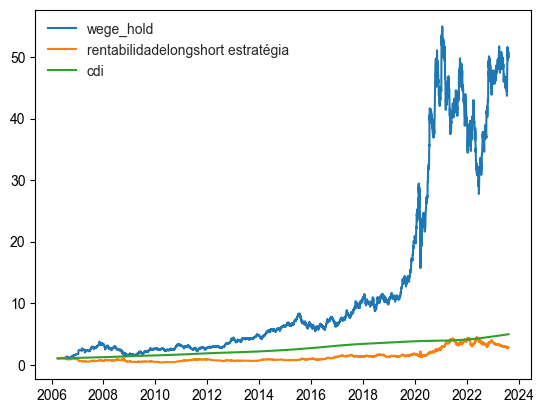

In [34]:

plt.plot(df_wege.index,(df_wege["retorno diario"]+1).cumprod(), label="wege_hold")
plt.plot(df_wege.index,(df_wege["rentabilidadelongshort"]+1).cumprod(), label="rentabilidadelongshort estratégia")
plt.plot(df_wege.index, (df_wege["cdi"]+1).cumprod(), label="cdi")
plt.style.use("seaborn")
plt.legend()

backtest calculo sharpratio

In [35]:
premio_risco_long_short = df_wege["rentabilidadelongshort"] - df_wege["cdi"]

In [36]:
sharpe_ratio = np.mean(premio_risco_long_short) / np.std(premio_risco_long_short)
print(sharpe_ratio)

0.005293747351812038


backtest calculando beta e alpha


In [37]:

X = sm.add_constant(df_wege["cdi"])
modelo = sm.OLS(df_wege["rentabilidadelongshort"], X).fit()
alfa, beta = modelo.params

print("Beta:", beta)
print("Alfa:", alfa)

Beta: -3.9105038327036277
Alfa: 0.0019470396113361378


Trade System LONG

In [38]:
number_of_orders = 0
sinal_macd = list([])
for i in range(len(df_wege)):
    if (df_wege["fastsignal"].iloc[i-1] <= df_wege["slowsignal"].iloc[i])&(df_wege["fastsignal"].iloc[i] > df_wege["slowsignal"].iloc[i])&((number_of_orders == 0)or(number_of_orders == None)):
        sinal_macd.append(1)
        number_of_orders = 1
        print(1)
    elif (df_wege["fastsignal"].iloc[i-1] >= df_wege["slowsignal"].iloc[i])&(df_wege["fastsignal"].iloc[i] < df_wege["slowsignal"].iloc[i])&((number_of_orders == 1)or(number_of_orders == None)):
        sinal_macd.append(2)
        number_of_orders = 0
        print(2)
    else:
        sinal_macd.append(0)  
        print(0)  

sinal_macd = pd.DataFrame(sinal_macd)
sinal_macd.value_counts()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
2
1
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
1
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0


0    3959
1     172
2     171
dtype: int64

In [39]:
df_wege["macdsignallong"] = sinal_macd.values


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
ultimo_valor = None
for i in range(len(df_wege)):
    if(df_wege["macdsignallong"].iloc[i] != 0):
        ultimo_valor = df_wege["macdsignallong"].iloc[i]
    elif(df_wege["macdsignallong"].iloc[i] == 0):
        df_wege["macdsignallong"].iloc[i] = ultimo_valor 

c:\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Python37\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [41]:
for i in range(len(df_wege)):
    if (df_wege["macdsignallong"].iloc[i] == 2):
        df_wege["macdsignallong"].iloc[i] = 0


In [42]:
df_wege["macdsignallong"] = df_wege["macdsignallong"].fillna(0)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
vetor_rent = list([])
for i in range(0,len(df_wege)):
    if (df_wege["macdsignallong"].iloc[i-1] == 1):
        vetor_rent.append(df_wege["retorno diario"].iloc[i] * df_wege["macdsignallong"].iloc[i-1])

    elif (df_wege["macdsignallong"].iloc[i-1] == 0):
        vetor_rent.append((df_wege["retorno diario"].iloc[i] * df_wege["macdsignallong"].iloc[i-1])  + df_wege["cdi"].iloc[i])

In [44]:
df_wege["rentabilidadelong"] = vetor_rent

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


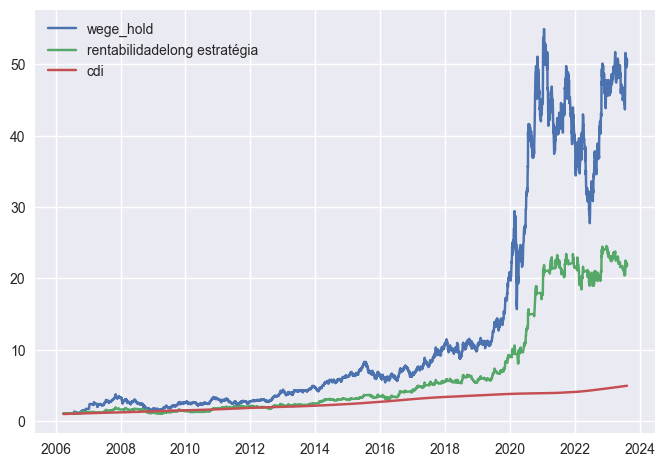

In [45]:

plt.plot(df_wege.index,(df_wege["retorno diario"]+1).cumprod(), label="wege_hold")
plt.plot(df_wege.index,(df_wege["rentabilidadelong"]+1).cumprod(), label="rentabilidadelong estratégia")
plt.plot(df_wege.index, (df_wege["cdi"]+1).cumprod(), label="cdi")
plt.style.use("seaborn")
plt.legend()

Backtest sharp ratio long

In [46]:
premio_risco_long = df_wege["rentabilidadelong"] - df_wege["cdi"]


In [47]:
sharpe_ratio_long = np.mean(premio_risco_long) / np.std(premio_risco_long)
print(sharpe_ratio_long)

0.03075422685486504


Backtest calculando beta e alpha

In [48]:

Y = sm.add_constant(df_wege["cdi"])
modelo = sm.OLS(df_wege["rentabilidadelong"], Y).fit()
alfa, beta = modelo.params

print("Beta:", beta)
print("Alfa:", alfa)

Beta: -3.68002474575451
Alfa: 0.002194921937465727


IMPLEMENTAÇÃO MACHINE LEARNING

In [49]:
vetor = list([])
for i in range(len(df_wege)-1):
    if (i == len(df_wege)):
        vetor.append(0)
    elif (df_wege["Adj Close"].iloc[i+1]  <  df_wege["Adj Close"].iloc[i]):
        vetor.append(0)
    elif (df_wege["Adj Close"].iloc[i+1]  >  df_wege["Adj Close"].iloc[i]): 
        vetor.append(1)
    else:
        vetor.append(0)    

In [50]:
df_wege = df_wege.drop(df_wege.index[-1])


In [51]:
df_wege["signal"] = vetor


In [52]:
df_wege = df_wege.dropna()


In [53]:
df_ml = df_wege[df_wege.index < "2020-01-01"]

In [54]:
df_ml_bt = df_wege[df_wege.index > "2020-01-01"]

In [55]:
from sklearn.model_selection import train_test_split

Y = df_ml["signal"]
X = df_ml.loc[:, (df_ml.columns != "signal")&(df_ml.columns != "macdsignallong")&(df_ml.columns != "macdsignal")&(df_ml.columns != "rentabilidadelong")&(df_ml.columns != "rentabilidadelongshort")&(df_ml.columns != "Close")]

X = pd.DataFrame(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [56]:
import xgboost
xgb = xgboost.XGBClassifier()


In [57]:
xgb.fit(X, Y)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [58]:
predictxgbtest = xgb.predict(x_test)


In [59]:
from sklearn.metrics import classification_report


In [60]:
print(classification_report(predictxgbtest, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       560
           1       0.99      0.99      0.99       462

    accuracy                           0.99      1022
   macro avg       0.99      0.99      0.99      1022
weighted avg       0.99      0.99      0.99      1022



In [61]:
from sklearn.tree import DecisionTreeClassifier


In [62]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)



DecisionTreeClassifier()

In [63]:
predictdttest = dt.predict(x_test)


In [64]:
print(classification_report(predictdttest, y_test))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58       532
           1       0.53      0.50      0.52       490

    accuracy                           0.55      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.55      0.55      0.55      1022



In [65]:
Y = df_ml_bt["signal"]
X = df_ml_bt.loc[:, (df_ml_bt.columns != "signal")&(df_ml_bt.columns != "macdsignallong")&(df_ml_bt.columns != "macdsignal")&(df_ml_bt.columns != "rentabilidadelong")&(df_ml_bt.columns != "rentabilidadelongshort")&(df_ml_bt.columns != "Close")]

X = pd.DataFrame(X)

In [66]:
df_ml_bt["mlsignal"] = xgb.predict(X)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_ml_bt["retml"] = df_ml_bt["mlsignal"] * df_ml_bt["retorno diario"]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
for i in range(len(df_ml_bt)):
    if (df_ml_bt["retml"].iloc[i] == 0 ):
        df_ml_bt["retml"].iloc[i] = df_ml_bt["cdi"].iloc[i]


c:\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


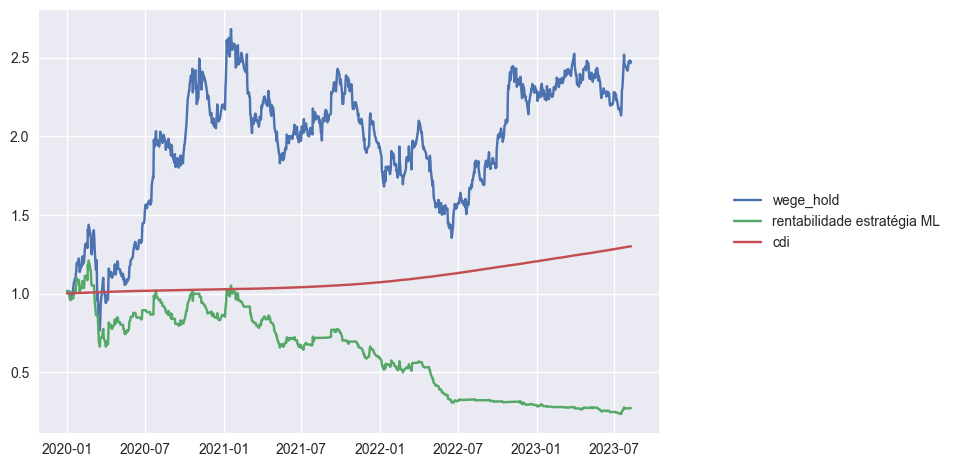

In [69]:
plt.plot(df_ml_bt.index,(df_ml_bt["retorno diario"]+1).cumprod(), label="wege_hold")
plt.plot(df_ml_bt.index,(df_ml_bt["retml"]+1).cumprod(), label="rentabilidade estratégia ML")
plt.plot(df_ml_bt.index, (df_ml_bt["cdi"]+1).cumprod(), label="cdi")
plt.style.use("seaborn")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

MODELO DE MACD COM RSI, SINAIS CONJUNTOS
  

In [70]:
k, d = tb.STOCHRSI(df_wege["Adj Close"], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)


In [71]:
df_wege["k"] = k.values
df_wege["d"] = d.values

In [72]:
df_wege = df_wege.dropna()



In [123]:
number_of_orders = 0
sinal_rsi_est = list([])
for i in range(len(df_wege)):
    if (df_wege["k"].iloc[i] < 30)&(df_wege["d"].iloc[i] < 30)&(number_of_orders == 0):#&(df_wege["hist"].iloc[i] > 0 ):
        sinal_rsi_est.append(1)
        number_of_orders = 1
        print(1)
    elif (df_wege["k"].iloc[i] > 70)&(df_wege["d"].iloc[i] > 70)&(number_of_orders == 1):#&(df_wege["hist"].iloc[i] < 0 ):
        sinal_rsi_est.append(-1)
        number_of_orders = 0
        print(2)
    else:
        sinal_rsi_est.append(0)  
        print(0)  

sinal_rsi_est = pd.DataFrame(sinal_rsi_est)
sinal_rsi_est.value_counts()

0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
2
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0


 0    3819
-1     231
 1     231
dtype: int64

In [124]:
df_wege["rsisignal"] = sinal_rsi_est.values

In [125]:
ultimo_valor = None
for i in range(len(df_wege)):
    if(df_wege["rsisignal"].iloc[i] != 0):
        ultimo_valor = df_wege["rsisignal"].iloc[i]
    elif(df_wege["rsisignal"].iloc[i] == 0):
        df_wege["rsisignal"].iloc[i] = ultimo_valor 

c:\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
df_wege["rsisignal"] = df_wege["rsisignal"].fillna(0)

In [127]:
for i in range(len(df_wege)):
    if (df_wege["rsisignal"].iloc[i] == -1):
        df_wege["rsisignal"].iloc[i] = 0

In [128]:
vetor_rent = list([])
for i in range(0,len(df_wege)):
    if (df_wege["rsisignal"].iloc[i-1] == 1):
        vetor_rent.append(df_wege["retorno diario"].iloc[i] * df_wege["rsisignal"].iloc[i-1])

    elif (df_wege["rsisignal"].iloc[i-1] == -1):
        vetor_rent.append((df_wege["retorno diario"].iloc[i] * df_wege["rsisignal"].iloc[i-1])  + 2*df_wege["cdi"].iloc[i])
    elif (df_wege["rsisignal"].iloc[i-1] == 0):
        vetor_rent.append((df_wege["retorno diario"].iloc[i] * df_wege["rsisignal"].iloc[i-1])  + df_wege["cdi"].iloc[i])    

In [129]:
df_wege["rentrsi"] = vetor_rent


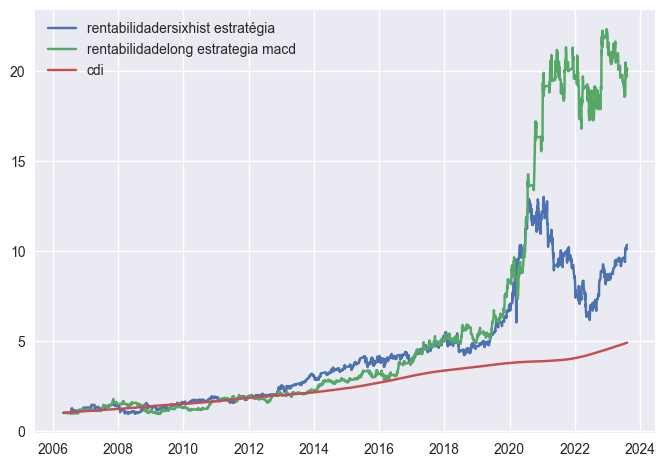

In [130]:

#plt.plot(df_wege.index,(df_wege["retorno diario"]+1).cumprod(), label="wege_hold")
plt.plot(df_wege.index,(df_wege["rentrsi"]+1).cumprod(), label="rentabilidadersixhist estratégia")
plt.plot(df_wege.index,(df_wege["rentabilidadelong"]+1).cumprod(), label="rentabilidadelong estrategia macd")
plt.plot(df_wege.index, (df_wege["cdi"]+1).cumprod(), label="cdi")
plt.style.use("seaborn")
plt.legend()